<a href="https://colab.research.google.com/github/Wonderingleon/Knn/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
data=pd.read_csv('bitcoin.csv',index_col='Date', parse_dates=True)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2.681000e+03
mean,9388.343453,9639.353182,9112.782767,9400.298554,9400.298554,1.257216e+10
std,13493.862242,13853.044105,13081.911569,13498.848368,13498.848368,1.704812e+10
min,150.128998,183.047470,145.483078,151.152512,151.152512,4.640334e+06
25%,536.707642,540.667664,531.953064,537.098938,537.098938,7.115727e+07
50%,5387.741211,5517.737305,5305.325195,5397.757324,5397.757324,4.296045e+09
75%,9042.831055,9246.205078,8851.007813,9054.121094,9054.121094,2.134688e+10
max,58290.289063,59496.148438,57269.132813,58305.039063,58305.039063,2.907271e+11


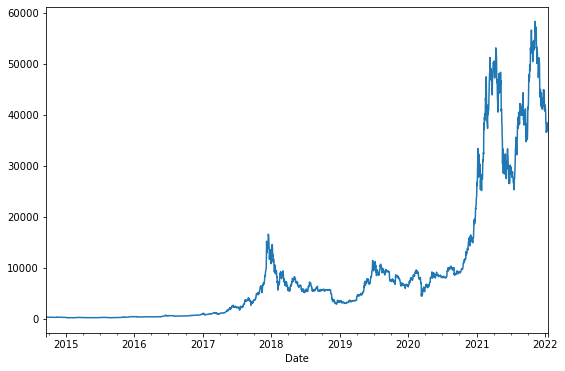

In [ ]:
data['Close'].plot(figsize=(9,6))
plt.show()

In [ ]:
data.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18'],
              dtype='datetime64[ns]', name='Date', length=2681, freq=None)

<ipython-input-35-eb528017913d>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2019-09']['Close'].plot()


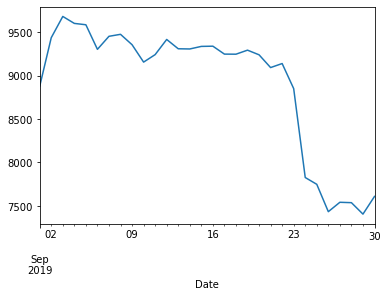

In [ ]:
data['2019-09']['Close'].plot()
plt.show()

<AxesSubplot:xlabel='Date'>

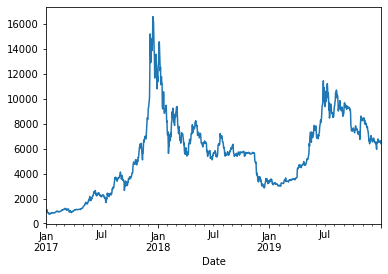

In [ ]:
data['2017':'2019']['Close'].plot()

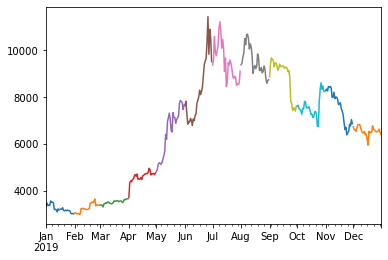

In [ ]:
data.loc['2019','Close'].resample('M').plot()
plt.show()

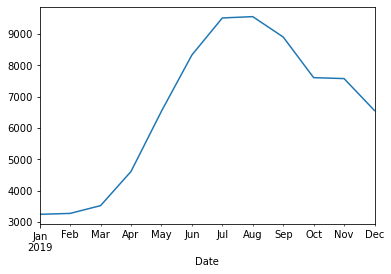

In [ ]:
data.loc['2019','Close'].resample('M').mean().plot()
plt.show()

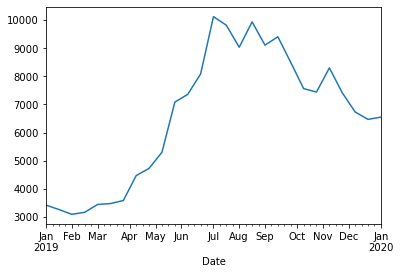

In [ ]:
data.loc['2019','Close'].resample('2W').mean().plot()
plt.show()

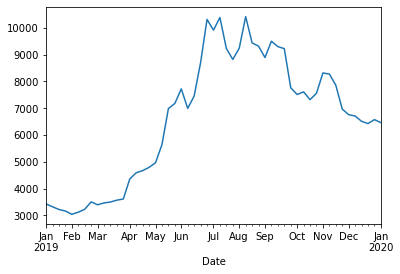

In [ ]:
data.loc['2019','Close'].resample('W').mean().plot()
plt.show()

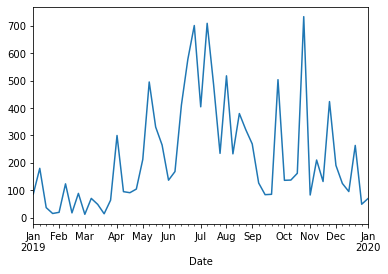

In [ ]:
data.loc['2019','Close'].resample('W').std().plot()
plt.show()

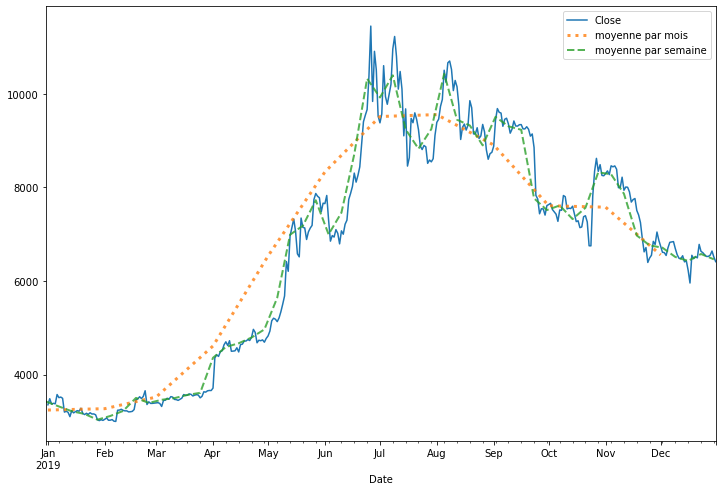

In [ ]:
plt.figure(figsize=(12,8))
data.loc['2019','Close'].plot()
data.loc['2019','Close'].resample('M').mean().plot(label='moyenne par mois',lw=3, ls=':', alpha=0.8)
data.loc['2019','Close'].resample('W').mean().plot(label='moyenne par semaine',lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

<ipython-input-54-fe3eb9f8c253>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  m=data['2019']['Close'].resample('W').agg(['mean','min','max'])


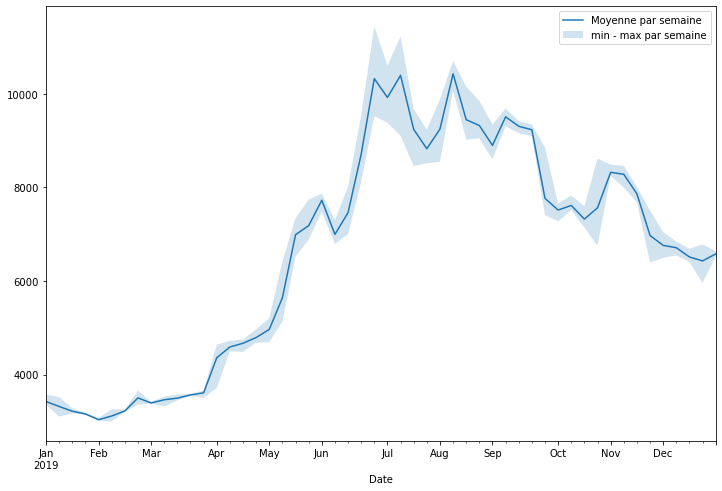

In [ ]:
m=data['2019']['Close'].resample('W').agg(['mean','min','max'])

plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='Moyenne par semaine')
plt.fill_between(m.index,m['max'],m['min'],alpha=0.2, label='min - max par semaine')

plt.legend()
plt.show()

Moving Average

Date
2019-01-01            NaN
2019-01-02            NaN
2019-01-03            NaN
2019-01-04            NaN
2019-01-05            NaN
                 ...     
2019-12-27    6586.998605
2019-12-28    6595.121652
2019-12-29    6574.883929
2019-12-30    6557.661621
2019-12-31    6530.281250
Name: Close, Length: 365, dtype: float64

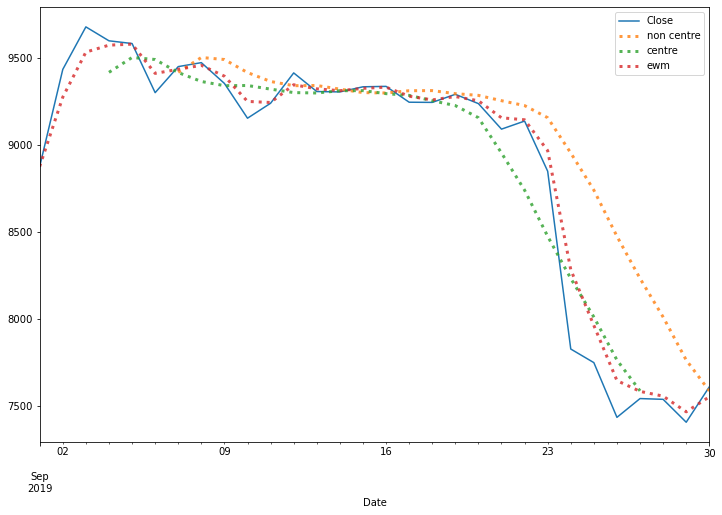

In [ ]:
plt.figure(figsize=(12,8))
data.loc['2019-09','Close'].plot()
data.loc['2019-09','Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
data.loc['2019-09','Close'].rolling(window=7,center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
data.loc['2019-09','Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

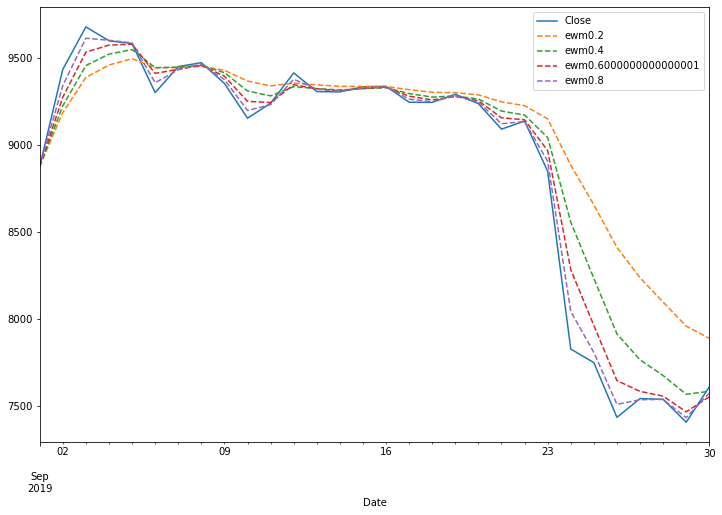

In [ ]:
plt.figure(figsize=(12,8))
data.loc['2019-09','Close'].plot()
for i in np.arange(0.2,1,0.2):
    data.loc['2019-09','Close'].ewm(alpha=i).mean().plot(label=f'ewm{i}', ls='--')
plt.legend()
plt.show()